# Data Preprocessing

Conclusões da 1ª parte: <br>
.Parece haver uma tendencia para clientes com mais de 50 anos sairem, indepentemente das outras variáveis; <br>
.Parece haver uma relação entre o nr de produtos e o abandono;<br>
.É necessário retirar os outliers do credit score e Age;<br>
.Na Alemanha o abandono é o dobro dos restantes;<br>
.Podemos retirar a variável HasCrCard dado que ter cartão ou não ter, parece não influenciar a target;<br>
.Podemos descartar a variável Complain. <br>


In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(os.path.join('Customer-Churn-Records.csv'))

<Axes: >

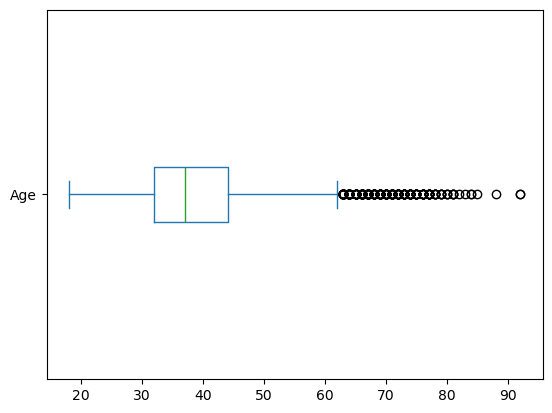

In [2]:
#ver outliers no nr de produtos e no Balance e idade
df['Age'].plot(kind='box', vert=False)

In [3]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')##Retirar


Number of outliers: 359


<Axes: >

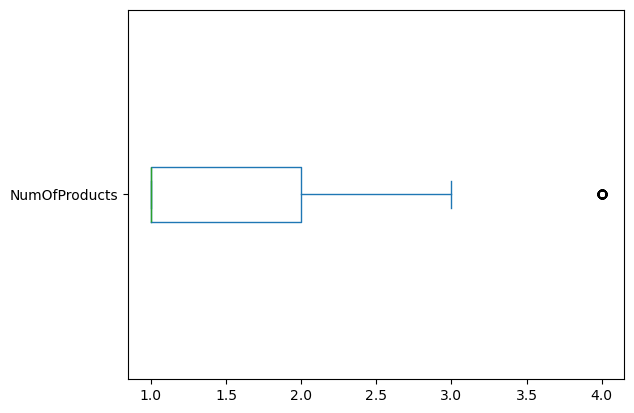

In [4]:
df['NumOfProducts'].plot(kind='box', vert=False)

In [5]:
Q1 = df['NumOfProducts'].quantile(0.25)
Q3 = df['NumOfProducts'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['NumOfProducts'] < lower_bound) | (df['NumOfProducts'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')


Number of outliers: 60


In [6]:
df['outlier'] = (df['NumOfProducts'] < lower_bound) | (df['NumOfProducts'] > upper_bound)
df.groupby(['NumOfProducts'])['outlier'].value_counts()

NumOfProducts  outlier
1              False      5084
2              False      4590
3              False       266
4              True         60
Name: count, dtype: int64

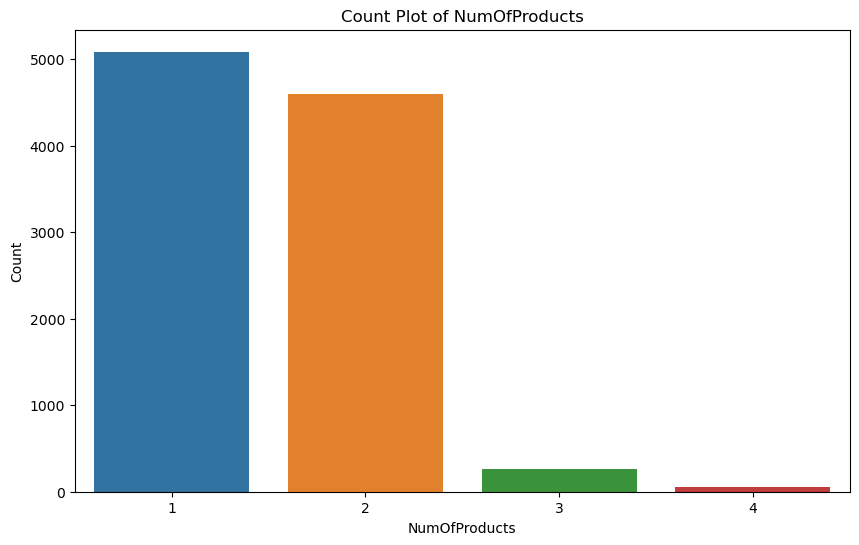

In [7]:

# Distribuição de NumOfProducts
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', data=df)
plt.title('Count Plot of NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show()

Decidimos manter estes outliers e avaliar mais tarde, consoante a performance do modelo.

<Axes: >

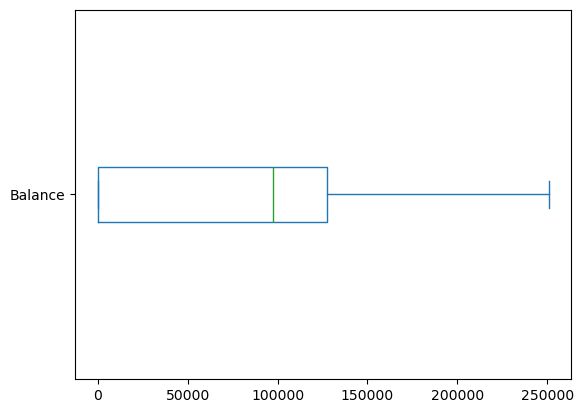

In [8]:
df['Balance'].plot(kind='box', vert=False)

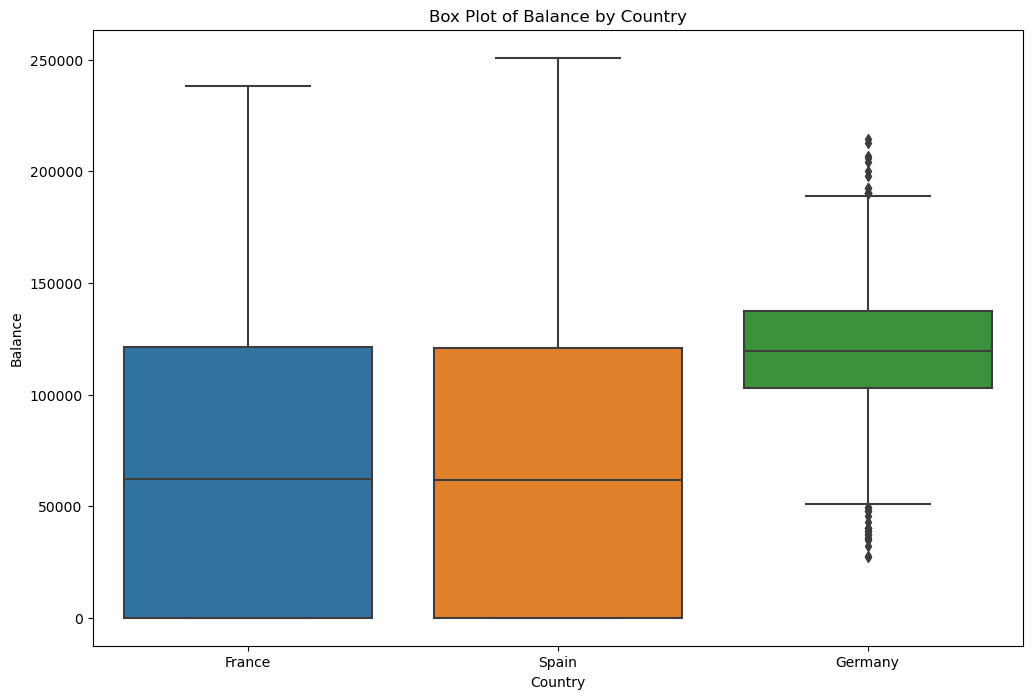

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Geography', y='Balance', data=df)
plt.title('Box Plot of Balance by Country')
plt.xlabel('Country')
plt.ylabel('Balance')
plt.show()

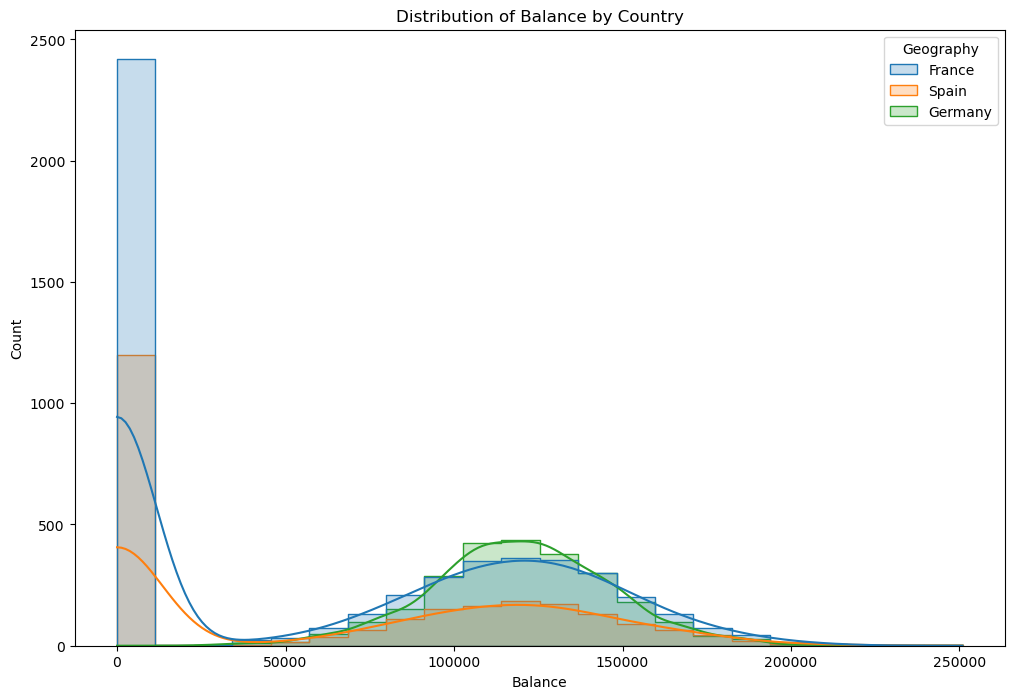

In [34]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Balance', hue='Geography', kde=True, element="step")
plt.title('Distribution of Balance by Country')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

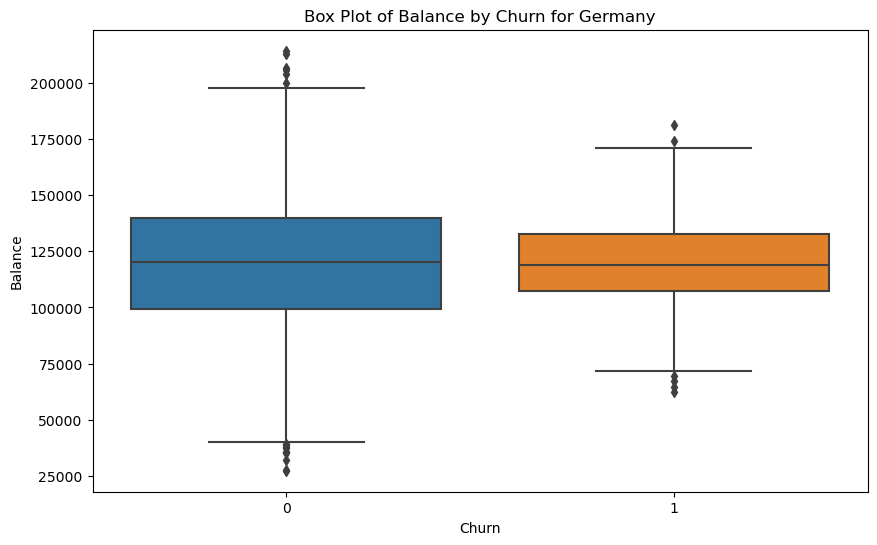

In [36]:

# Vamos tentar perceber o que se passa na Alemanha
df_germany = df[df['Geography'] == 'Germany']


plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df_germany)
plt.title('Box Plot of Balance by Churn for Germany')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.show()

Decidimos manter estes outliers alemães.

________________________________________________________________________________________________________________

#### Excluir as variaveis que não importam:
RowNumber; CustomerId; Surname; HasCrCard;Complain

In [38]:
df = df.drop(columns=['Complain'])
df = df.drop(columns=['HasCrCard'])
df = df.drop(columns=['Surname'])
df = df.drop(columns=['CustomerId'])
df = df.drop(columns=['RowNumber'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Card Type           10000 non-null  object 
 12  Point Earned        10000 non-null  int64  
 13  outlier             10000 non-null  bool   
dtypes: bool(1), float64(2), int64(8), object(3)
memory usage: 1.0+ MB


#### Retirar outliers das variáveis Age e CreditScore

In [39]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = ['CreditScore', 'Age']

df_no_outliers = df.copy()
for col in numerical_columns:
    df_no_outliers = remove_outliers(df_no_outliers, col)

rows_removed = df.shape[0] - df_no_outliers.shape[0]
print(f"Number of rows removed: {rows_removed}")
print(f"Shape of DataFrame before removing outliers: {df.shape}")
print(f"Shape of DataFrame after removing outliers: {df_no_outliers.shape}")

Number of rows removed: 374
Shape of DataFrame before removing outliers: (10000, 13)
Shape of DataFrame after removing outliers: (9626, 13)


### Converter variaveis categoricas em numericas (Geography, Gender, CartType)


In [40]:
# one-hot encoding
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Satisfaction Score  10000 non-null  int64  
 10  Card Type           10000 non-null  object 
 11  Point Earned        10000 non-null  int64  
 12  Gender_Male         10000 non-null  bool   
dtypes: bool(1), float64(2), int64(8), object(2)
memory usage: 947.4+ KB


In [16]:
df['Gender_Male']

0       False
1       False
2       False
3       False
4       False
        ...  
9995     True
9996     True
9997    False
9998     True
9999    False
Name: Gender_Male, Length: 10000, dtype: bool

In [41]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   IsActiveMember      10000 non-null  int64  
 6   EstimatedSalary     10000 non-null  float64
 7   Exited              10000 non-null  int64  
 8   Satisfaction Score  10000 non-null  int64  
 9   Card Type           10000 non-null  object 
 10  Point Earned        10000 non-null  int64  
 11  Gender_Male         10000 non-null  bool   
 12  Geography_Germany   10000 non-null  bool   
 13  Geography_Spain     10000 non-null  bool   
dtypes: bool(3), float64(2), int64(8), object(1)
memory usage: 888.8+ KB


In [42]:
df = pd.get_dummies(df, columns=['Card Type'], drop_first=True)

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   IsActiveMember      10000 non-null  int64  
 6   EstimatedSalary     10000 non-null  float64
 7   Exited              10000 non-null  int64  
 8   Satisfaction Score  10000 non-null  int64  
 9   Point Earned        10000 non-null  int64  
 10  Gender_Male         10000 non-null  bool   
 11  Geography_Germany   10000 non-null  bool   
 12  Geography_Spain     10000 non-null  bool   
 13  Card Type_GOLD      10000 non-null  bool   
 14  Card Type_PLATINUM  10000 non-null  bool   
 15  Card Type_SILVER    10000 non-null  bool   
dtypes: bo

### Normalizar as variáveis

##### Usamos a Standardization uma vez que algumas das variaveis têm uma distribuição normal.

In [44]:
from sklearn.preprocessing import StandardScaler

#  StandardScaler
scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Standardized DataFrame:")
print(df_standardized)

Standardized DataFrame:
      CreditScore       Age    Tenure   Balance  NumOfProducts  \
0       -0.326221  0.293517 -1.041760 -1.225848      -0.911583   
1       -0.440036  0.198164 -1.387538  0.117350      -0.911583   
2       -1.536794  0.293517  1.032908  1.333053       2.527057   
3        0.501521  0.007457 -1.387538 -1.225848       0.807737   
4        2.063884  0.388871 -1.041760  0.785728      -0.911583   
...           ...       ...       ...       ...            ...   
9995     1.246488  0.007457 -0.004426 -1.225848       0.807737   
9996    -1.391939 -0.373958  1.724464 -0.306379      -0.911583   
9997     0.604988 -0.278604  0.687130 -1.225848      -0.911583   
9998     1.256835  0.293517 -0.695982 -0.022608       0.807737   
9999     1.463771 -1.041433 -0.350204  0.859965      -0.911583   

      IsActiveMember  EstimatedSalary    Exited  Satisfaction Score  \
0           0.970243         0.021886  1.976555           -0.721130   
1           0.970243         0.216534 -0.

### Dividir o dataset em train e test
Considerando que o dataset não está balanceado.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
 
X = df.drop(columns=['Exited'])
y = df['Exited']

# Dividir  o dataset com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

train_df = X_train.copy()
train_df['Exited'] = y_train

test_df = X_test.copy()
test_df['Exited'] = y_test

print("Training Set:")
print(train_df)
print("\nTesting Set:")
print(test_df)

Training Set:
      CreditScore  Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
7680          808   25       7       0.00              2               1   
1837          561   56       7  152759.00              2               0   
2920          696   33       4       0.00              2               1   
2642          637   22       5   98800.00              1               0   
4800          690   39       6       0.00              2               0   
...           ...  ...     ...        ...            ...             ...   
8134          577   41       6       0.00              1               1   
4239          636   39       3  118336.14              1               0   
4486          528   35       3  156687.10              1               0   
541           622   26       9       0.00              2               1   
8505          592   28       5  137222.77              1               0   

      EstimatedSalary  Satisfaction Score  Point Earned  outlier  Gender_

In [23]:
test_df['Exited'].value_counts()

Exited
0    2389
1     611
Name: count, dtype: int64

In [24]:
train_df['Exited'].value_counts()

Exited
0    5573
1    1427
Name: count, dtype: int64

##### Ok. Sendo a target apenas 20% do dataset, é provavel que necessitemos de aplicar uma regra de undersampling ou oversampling.

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [46]:
# Modelo de Regressão Logistica  
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [47]:
# Prever no teste
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Avaliar
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAUC-ROC Score:")
print(roc_auc_score(y_test, y_pred_prob))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      2389
           1       0.36      0.71      0.48       611

    accuracy                           0.69      3000
   macro avg       0.63      0.69      0.63      3000
weighted avg       0.79      0.69      0.71      3000


Confusion Matrix:
[[1623  766]
 [ 178  433]]

AUC-ROC Score:
0.7408252088301606


 ##### O F1-Score para a classe Exited =1 é demasiado baixo, bem como a AUC-ROC. Pelo sugerimos aplicar a técnica SMOTE.

In [48]:
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
from matplotlib import pyplot


In [49]:
from imblearn.over_sampling import SMOTE

In [50]:

#  SMOTE
smote = SMOTE(random_state=42)


X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_res, y_train_res)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAUC-ROC Score:")
print(roc_auc_score(y_test, y_pred_prob))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.59      0.72      2389
           1       0.33      0.77      0.46       611

    accuracy                           0.63      3000
   macro avg       0.62      0.68      0.59      3000
weighted avg       0.79      0.63      0.66      3000


Confusion Matrix:
[[1415  974]
 [ 140  471]]

AUC-ROC Score:
0.7366818321014416


#### Nota:

Diria que 77% de recall para exited=1, é bastante positivo, considerando ser a métrica mais importante neste caso concreto em que importa minimizar os falsos negativos. (Conseguimos acertar em 77% dos que realmente abandonam o Banco). Na matriz de confusão vemos FN = 140, mas FP = 974 que é elevado. O ideal seria conseguirmos, otimizar o modelo ou encontrar outro que mantivesse a performance nos falsos negativos, mas melhorasse os restantes indicadores.